dataset: https://www.kaggle.com/andyczhao/covidx-cxr2?select=train.txt

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
metadata = os.getcwd() + '/train.txt'

In [4]:
train_txt= pd.read_csv(metadata, sep=" ", header=None)
train_txt.columns= ["patient id","file_name","class","source"]
train_txt.head()

FileNotFoundError: [Errno 2] File /media/trucloan/Data/Research/BT_Phu/covid-chestxray-dataset-master/archive_13gb/note_book/train.txt does not exist: '/media/trucloan/Data/Research/BT_Phu/covid-chestxray-dataset-master/archive_13gb/note_book/train.txt'

In [ ]:
train_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15951 entries, 0 to 15950
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient id  15951 non-null  object
 1   file_name   15951 non-null  object
 2   class       15951 non-null  object
 3   source      15951 non-null  object
dtypes: object(4)
memory usage: 498.6+ KB


In [ ]:
# count P & N
train_txt['class'].value_counts()

negative    13793
positive     2158
Name: class, dtype: int64

In [ ]:
train_txt['class']

0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
15946    negative
15947    negative
15948    negative
15949    negative
15950    negative
Name: class, Length: 15951, dtype: object

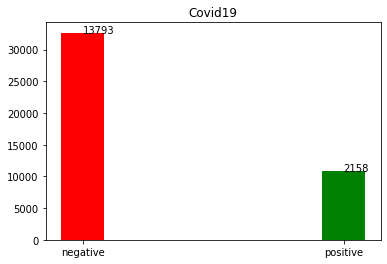

In [ ]:
#vẽ biểu đồ dạng cột
x_values =[0,1]
data_labels = ['13793','2158']
height = [32650,10802]
bars = ['negative', 'positive']
width = 1/6

plt.bar(bars,height , width, color = ['red', 'green'])

plt.title('Covid19')

for i in range(len(data_labels)): # your number of bars
  plt.text(x = x_values[i], #takes your x values as horizontal positioning argument 
  y = height[i]+5, #takes your y values as vertical positioning argument 
  s = data_labels[i]) # the labels you want to add to the data

plt.savefig('Covid19')
plt.show()

In [ ]:
positive_path, negative_path = './Positive', './Negative'
if not os.path.exists(positive_path): 
    os.mkdir(positive_path)
    
if not os.path.exists(negative_path): 
    os.mkdir(negative_path)

In [ ]:
#tách theo nhãn N P
import shutil
source = './train/'

for i in range(len(train_txt)):
    if train_txt['class'][i] == 'negative':
        shutil.copy(source + train_txt['file_name'][i], negative_path )
    else:
        shutil.copy(source + train_txt['file_name'][i], positive_path)


In [ ]:
img = source + train_txt['file_name'][0] # doc len roi xem shape

In [ ]:
img

'./train/ARDSSevere.png'

In [ ]:
print(img)

In [ ]:
from sklearn.model_selection import train_test_split
train_set,val_set=train_test_split(train_txt,test_size=0.2, random_state = 42, shuffle=True)

In [ ]:
len(train_set)

In [ ]:
len(val_set)

In [ ]:
train_set.head()